In [7]:
import pandas as pd

df = pd.read_csv("student_data.csv", encoding='latin1')

df["passed"] = df["G3"].apply(lambda x: 1 if x >= 10 else 0)

df[["G3", "passed"]].head()


,G3,passed
0,6,0
1,6,0
2,10,1
3,15,1
4,10,1


In [8]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

for col in df_encoded.select_dtypes(include=["object"]):
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

df_encoded.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,passed
0,0,0,18,1,0,0,4,4,0,4,...,3,4,1,1,3,6,5,6,6,0
1,0,0,17,1,0,1,1,1,0,2,...,3,3,1,1,3,4,5,5,6,0
2,0,0,15,1,1,1,1,1,0,2,...,3,2,2,3,3,10,7,8,10,1
3,0,0,15,1,0,1,4,2,1,3,...,2,2,1,1,5,2,15,14,15,1
4,0,0,16,1,0,1,3,3,2,2,...,3,2,1,2,5,4,6,10,10,1


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Features and target
X = df_encoded.drop(["G3", "passed"], axis=1)  
y = df_encoded["passed"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Results
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8987341772151899

Confusion Matrix:
 [[23  4]
 [ 4 48]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85        27
           1       0.92      0.92      0.92        52

    accuracy                           0.90        79
   macro avg       0.89      0.89      0.89        79
weighted avg       0.90      0.90      0.90        79



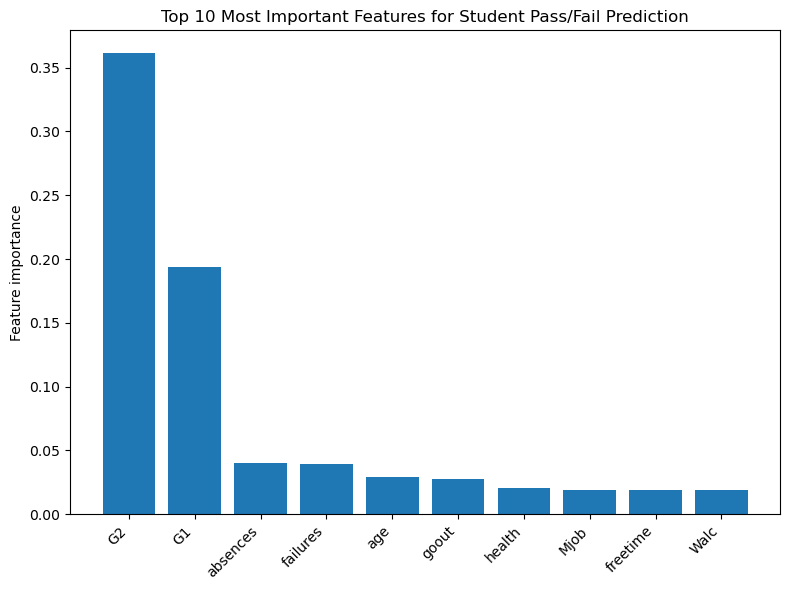

In [10]:
import numpy as np
import matplotlib.pyplot as plt

importances = model.feature_importances_
feature_names = np.array(X.columns)

indices = np.argsort(importances)[::-1]

top_n = 10
top_indices = indices[:top_n]

plt.figure(figsize=(8, 6))
plt.bar(range(top_n), importances[top_indices])
plt.xticks(range(top_n), feature_names[top_indices], rotation=45, ha="right")
plt.ylabel("Feature importance")
plt.title("Top 10 Most Important Features for Student Pass/Fail Prediction")
plt.tight_layout()
plt.show()


In [11]:
feature_means = X_train.mean()

def predict_single_student(model):
    print("\n--- Predict for a new student ---")

    age = int(input("Age: "))
    studytime = int(input("Study time (1–4, from dataset definition): "))
    failures = int(input("Number of past class failures (0–3): "))
    absences = int(input("Number of absences: "))
    G1 = int(input("G1 (first period grade, 0–20): "))
    G2 = int(input("G2 (second period grade, 0–20): "))


    sample = feature_means.copy()


    overrides = {
        "age": age,
        "studytime": studytime,
        "failures": failures,
        "absences": absences,
        "G1": G1,
        "G2": G2
    }

    for col, val in overrides.items():
        if col in sample.index:  
            sample[col] = val


    sample_df = pd.DataFrame([sample], columns=X.columns)


    pred = model.predict(sample_df)[0]
    prob_pass = model.predict_proba(sample_df)[0][1]  

    if pred == 1:
        print(f"\nPrediction: PASS (Confidence: {prob_pass*100:.2f}%)")
    else:
        print(f"\nPrediction: FAIL (Confidence: {(1 - prob_pass)*100:.2f}%)")


predict_single_student(model)


--- Predict for a new student ---


Age:  21
Study time (1–4, from dataset definition):  1
Number of past class failures (0–3):  2
Number of absences:  5
G1 (first period grade, 0–20):  10
G2 (second period grade, 0–20):  15



Prediction: PASS (Confidence: 65.00%)
